# FNCE30012: Foundations of Fintech - Assignment 3

This assignment builds on Lectures and Tutorials on Machine Learning. You might want to consider using some of the Python code discussed in those lectures and tutorials to answer some of the questions below.

**Important:** It is important that you *do not* change the type (markdown vs. code) of any cell, *nor* copy/paste/duplicate any cell! If the cell type is markdown, you are supposed to write text, not code, and vice versa. Provide your answer to each question in the allocated cell. *Do not* rename the assignment files. All files should be left as is in the assignment directory.

## Task 1
You are given two types of datasets:
1. A file called `news-data.csv`, that contains financial news (headlines) and daily returns for Microsoft (MSFT), JP Morgan (JPM), Amazon (AMZN), Johnson & Johnson (JNJ) and Exxon Mobil (XOM). Relying on this data set, your role as a FinTech student is to explore the relationship between financial news and stock returns.  
  
  
2. 5 files that contain daily returns data for these companies. These files are called `MSFT_returns.csv`, `JPM_returns.csv`, `AMZN_returns.csv`, `JNJ_returns.csv` and `XOM_returns.csv`.


#### Helpful commands

You may find the following commands helpful to complete some of the questions.

1. How to create a new column using data from existing column? Recall that, in Tutorial 7, we worked with a variable called `FSscore`. Suppose we wanted to divide all the values of this variable by `100` and store the outcome in a new column. This can be done in one step. The code `df['FSscore_scaled'] = df['FSscore']/100` creates a new column with the name `FSscore_scaled` and stores the modified values.


2. How to separate a string variable into a list of strings? The method `split()` splits a string into a list based on a specified separator. The default separator is any white space. However, one can specify the applied separator as an argument. For example, the code `"a,b,c".split(",")` splits the string `"a,b,c"` into the list `[a, b, c]`.


3. You can use string functions such as `split()` on a `Pandas` `dataframe` column by using the `str` attribute. For example, `df['alphabets'].str.split(",")` returns a series (consider a series as a `dataframe` with one column) that contains a list obtained by running the split function on each entry in the column named `alphabets`.


4. How to chain multiple string operations in `Pandas`? Note that a string function on a `Pandas` column returns a series. One can then use another string function on this series to chain multiple operations. For example, the cell below first converts the string to upper case and then calls the split function.


5. How to combine two or more data frames? For this purpose, one can use the `concat` function from `Pandas`. To combine the `dataframes` to match indices you can use the `axis=1` argument. Please see https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html for examples.

In [2]:
## Execute this cell

####################### Package Setup ##########################

import pandas as pd
import numpy as np
from IPython.display import Markdown, display
from finml import *
%matplotlib inline

# for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

################################################################
# Example of string operations
import pandas as pd
example_data = {'alphabets':['a,b,c', 'd,e,f', 'a,z,x', 'a,s,p']} 
example_df = pd.DataFrame(example_data) 

# Chain two string operations
example_df['alphabets'].str.upper().str.split(",")

0    [A, B, C]
1    [D, E, F]
2    [A, Z, X]
3    [A, S, P]
Name: alphabets, dtype: object

### Data exploration and transformation

The news data set has the following four columns :

1. `date`: This column contains the date of the observation.  
  
2. `ticker`: The ticker symbol of the company

3. `returns`: This column contains the daily returns.

4. `headlines`: This column contains the concatenation of headlines for that date. The headlines are separated by the `<END>` string. For example, if there are three headlines `h1`, `h2`, and `h3` on a given day, the headline cell for that day will be the string `h1<END>h2<END>h3`.


In your assignment, please address the following questions.

## Question 1 (1 marks)
Load the data set in a `Pandas` `dataframe` and write a Python code that plots the time series of daily returns of **Johnson & Johnson (JNJ)** and **Exxon Mobil (XOM)** (returns on the y-axis and dates on the x-axis). Make sure your plots are appropriately labelled. You should create two plots, one for each firm.

**Note:** Please use `df` as the variable name for the `dataframe` and the `parse_dates` argument to correctly parse the date column. You can read more about this argument here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html 

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

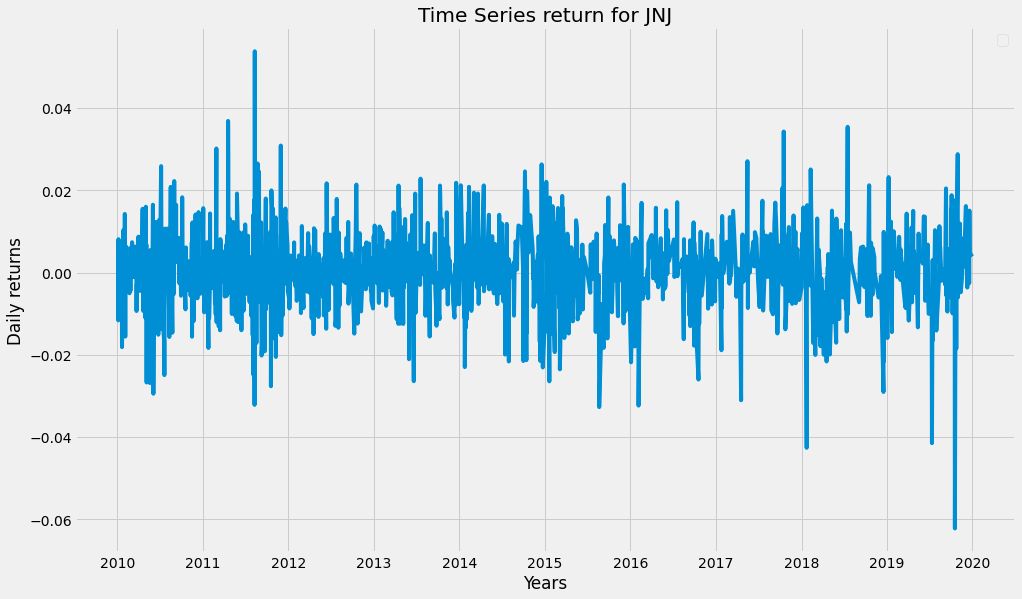

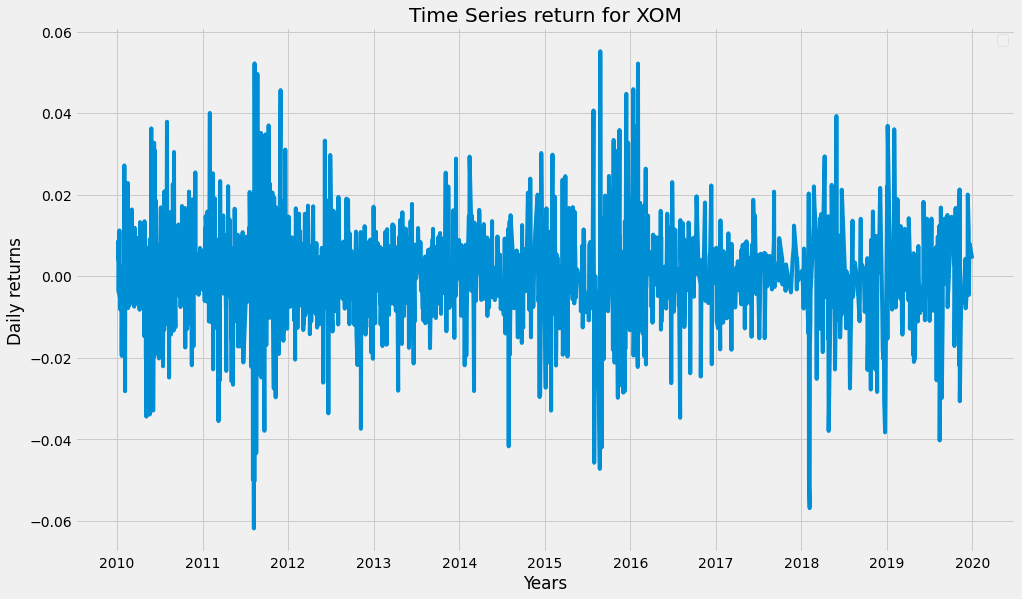

In [3]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df = pd.read_csv("news_data.csv", parse_dates = ['date'])
df.head()
# Extracting JNJ & XOM data from news file and setting the index
df = df.set_index('ticker')
JNJ = df.loc['JNJ']
XOM = df.loc['XOM']


JNJ = JNJ.set_index('date')
XOM = XOM.set_index('date')
JNJ['returns']

# Plotting JNJ returns and dates
plot_JNJ = plt.figure(1)
plt.figure(figsize=(15,9))
plt.plot(JNJ.index,JNJ['returns'])
plt.ylabel('Daily returns')
plt.xlabel('Years')
plt.title('Time Series return for JNJ')
plt.legend()

# Plotting XOM returns and dates
plot_XOM = plt.figure(2)
plt.figure(figsize=(15,9))
plt.plot(XOM.index,XOM['returns'])
plt.ylabel('Daily returns')
plt.xlabel('Years')
plt.title('Time Series return for XOM')
plt.legend()


In [13]:
df['headlines']['JNJ']

JNJ    AT A GLANCE: EMEA Equities Highlights To Jan 4...
JNJ    SportsTicker: Jets Owner's Daughter; J&amp;J H...
JNJ    Johnson &amp; Johnson Agency To Acquire Sunbel...
JNJ    Johnson &amp; Johnson (JNJ) Mkt On Close Buy I...
JNJ    UPDATE: Vivus Obesity Drug Shows Effectiveness...
                             ...                        
JNJ    Johnson &amp; Johnson Raised to Overweight Fro...
JNJ    J&amp;J Gets Another Win In Baby Powder Lawsui...
JNJ    Johnson &amp; Johnson Raised to Overweight Fro...
JNJ    J&amp;J's Janssen Gets European Approval for S...
JNJ    XBiotech Shares Climb Nearly 8% in After Hours...
Name: headlines, Length: 1443, dtype: object

## Question 2 (1 marks) 

Write a Python code that plots the time series of daily headline frequencies (the number of headlines per day on the y-axis and the corresponding date on the x-axis) for the two companies from the previous question (JNJ and XOM).  You should create two plots, one for each firm. Make sure your plot's axes are appropriately labelled. Please reuse the `df` variable you created as part of the previous question.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

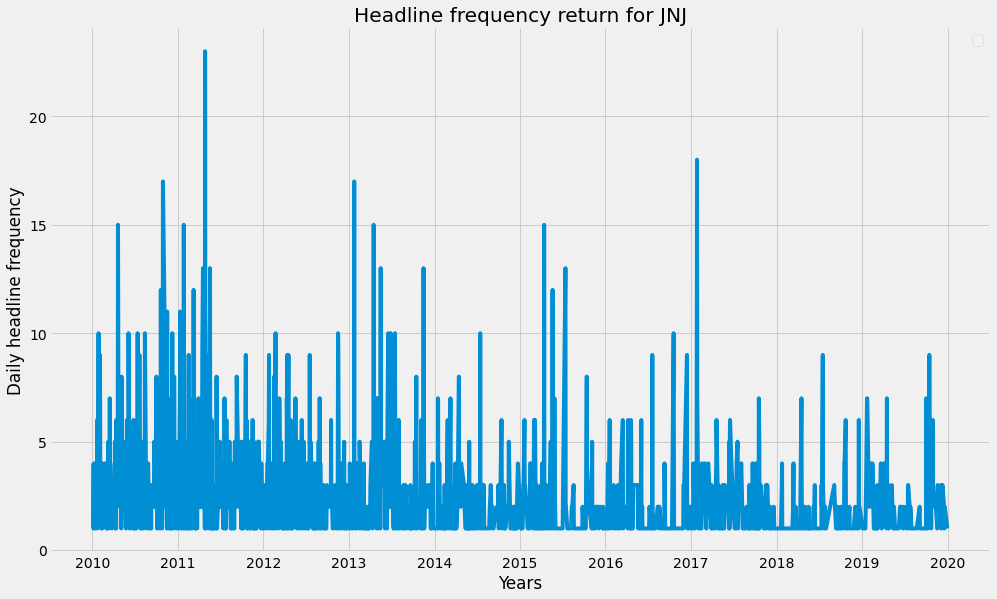

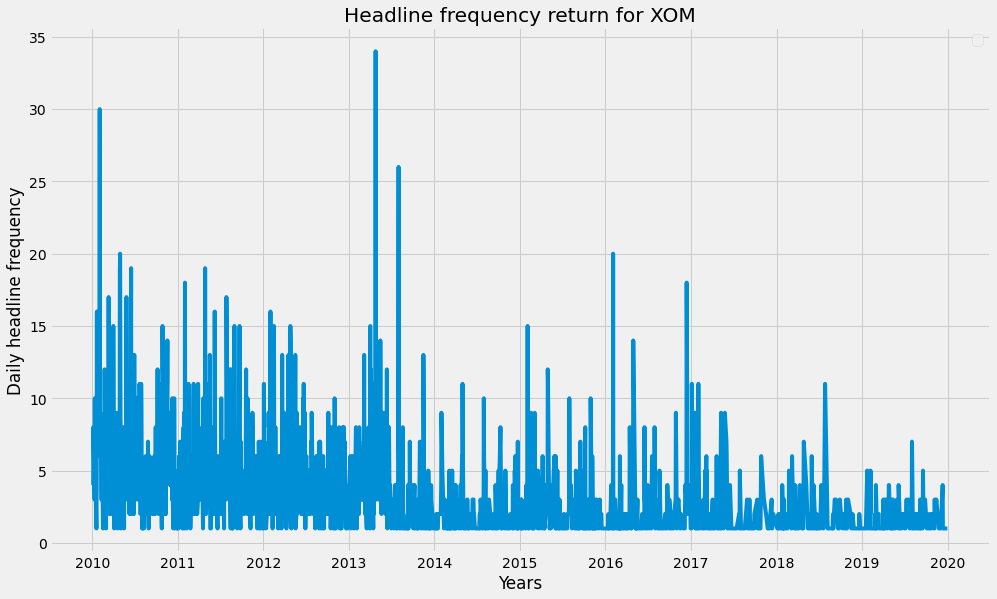

In [4]:
# Splitting the headlines into articles and counting it for JNJ
JNJ['split_headlines_JNJ'] = JNJ['headlines'].str.split('<END>')
JNJ['headlines_count']=JNJ['split_headlines_JNJ'].str.len()
# Plot
plot_JNJ_headlines = plt.figure(3)
plt.figure(figsize=(15,9))
plt.plot(JNJ.index,JNJ['headlines_count'])
plt.ylabel('Daily headline frequency')
plt.xlabel('Years')
plt.title('Headline frequency return for JNJ')
plt.legend()


# Splitting the headlines into articles and counting it for XOM
XOM['split_headlines_JNJ'] = XOM['headlines'].str.split('<END>')
XOM['headlines_count']=XOM['split_headlines_JNJ'].str.len()
# Plot
plot_XOM_headlines = plt.figure(4)
plt.figure(figsize=(15,9))
plt.plot(XOM.index,XOM['headlines_count'])
plt.ylabel('Daily headline frequency')
plt.xlabel('Years')
plt.title('Headline frequency return for XOM')
plt.legend()


## Question 3 (1 mark)

In at most three sentences explain the role of NLP and the use of `tf-idf` technique in the context of our data set. 

#### Write your answer below (Remove any existing text)

NLP helps in transforming unstructured data into numerical data which makes it easy to interpret by the program/computer. Tf-idf is an NLP technique, in our case it will help us determine words or phrases in a headline that impact or lead to movements in returns of stock prices, the term-frequency component finds the most frequently occurred words and the inverse document frequency component helps to appropriately re-weights words by de-weighting the common words like = "the", "and", etc. By using this technique we can analyse large datasets of text to find a relationship between news headlines and stock price movements.

## Question 4 (2 marks)

We will use neural networks to explore the relationship between the content of financial news and the direction of stock returns, i.e., their classification into positive or negative returns.

1. Create a new column called `returns_direction` in the `dataframe` that classifies daily returns based on their direction: it assigns a given return a value of 1, if the return is positive (i.e, greater than 0), and a value of 0 otherwise. You may find the `Numpy` function `where()` useful for this question. Print the initial rows of the data frame using `head()` method from pandas. You may also use `IPython`'s `display` method instead of the `print` function for a cleaner output.


2. For each company, count the number of days on which the stock had positive and non-positive returns, respectively. You may use the `groupby` function from Pandas. You should print the output containing respective counts.

In [3]:
df['returns_direction']= np.where(df['returns']<=0,0,1)

display(df)


# No of days each company had positive and non positive returns
#JNJ
JNJ['returns_direction']= np.where(JNJ['returns']<=0,0,1)
JNJ_positive_return_days = 0
JNJ_negative_return_days = 0
for positive in JNJ['returns_direction']:   
    if positive == 1:
        JNJ_positive_return_days += 1
    else:
        JNJ_negative_return_days += 1
print("Days with Positve returns for Johnson and Johnson:", JNJ_positive_return_days)
print("Days with Negative returns for Johnson and Johnson:",JNJ_negative_return_days)


# EXXON
XOM['returns_direction']= np.where(XOM['returns']<=0,0,1)
XOM_positive_return_days = 0
XOM_negative_return_days = 0
for positive in XOM['returns_direction']:   
    if positive == 1:
        XOM_positive_return_days += 1
    else:
        XOM_negative_return_days += 1
print("Days with Positve returns for Exxon Mobil:",XOM_positive_return_days)
print("Days with Negative returns for Exxon Mobil:",XOM_negative_return_days)


# Microsoft
MSFT = df.loc['MSFT']
MSFT['returns_direction']= np.where(MSFT['returns']<=0,0,1)
MSFT_positive_return_days = 0
MSFT_negative_return_days = 0
for positive in MSFT['returns_direction']:   
    if positive == 1:
        MSFT_positive_return_days += 1
    else:
        MSFT_negative_return_days += 1
print("Days with Positve returns for Microsoft:",MSFT_positive_return_days)
print("Days with Negative returns for Microsoft:",MSFT_negative_return_days)


# JP Morgan
JPM = df.loc['JPM']
JPM['returns_direction']= np.where(JPM['returns']<=0,0,1)
JPM_positive_return_days = 0
JPM_negative_return_days = 0
for positive in JPM['returns_direction']:   
    if positive == 1:
        JPM_positive_return_days += 1
    else:
        JPM_negative_return_days += 1
print("Days with Positve returns for JP Morgan:",JPM_positive_return_days)
print("Days with Negative returns for JP Morgan:",JPM_negative_return_days)


# Amazon
AMZN = df.loc['AMZN']
AMZN['returns_direction']= np.where(AMZN['returns']<=0,0,1)
AMZN_positive_return_days = 0
AMZN_negative_return_days = 0
for positive in AMZN['returns_direction']:   
    if positive == 1:
        AMZN_positive_return_days += 1
    else:
        AMZN_negative_return_days += 1
print("Days with Positve returns for Amazon:",AMZN_positive_return_days)
print("Days with Negative returns for Amazon:",AMZN_negative_return_days)


,date,returns,headlines,returns_direction
ticker,,,,
MSFT,2010-01-04,0.015420,MARKETWATCH VIEW: Wal-Mart Tops List Of Advise...,1
JNJ,2010-01-04,0.004192,AT A GLANCE: EMEA Equities Highlights To Jan 4...,1
MSFT,2010-01-05,0.000323,Stock-Fund Investors Greet New Year With A Gri...,1
JNJ,2010-01-05,-0.011596,SportsTicker: Jets Owner's Daughter; J&amp;J H...,0
JPM,2010-01-05,0.019370,Swiss Re Enters Into $1B long-term Letter of C...,1
...,...,...,...,...
JPM,2019-12-27,0.000719,FINRA Sanctions Citigroup Global Markets Inc.;...,1
AMZN,2019-12-31,0.000514,Apple's Stock Rises Toward Record While The Do...,1
JNJ,2019-12-31,0.003923,XBiotech Shares Climb Nearly 8% in After Hours...,1


Days with Positve returns for Johnson and Johnson: 759
Days with Negative returns for Johnson and Johnson: 684
Days with Positve returns for Exxon Mobil: 863
Days with Negative returns for Exxon Mobil: 846
Days with Positve returns for Microsoft: 927
Days with Negative returns for Microsoft: 892
Days with Positve returns for JP Morgan: 1017
Days with Negative returns for JP Morgan: 969
Days with Positve returns for Amazon: 962
Days with Negative returns for Amazon: 841


## Question 5 (2 marks) 

Build and train a two-layer neural network with three units (neurons) to explain return directions based on financial news. You will be using the combined data of all companies for this task. Report and interpret the following performance measures: "Precision", "Recall", "Accuracy" and "ROC". If you think the model performs well (or poorly), explain why with reference to the relevant performance measures.

In [4]:
# extract our text and our labels and store them in separate arrays
X_texts = df["headlines"].values
y = df["returns_direction"].values

# split data into 80% training and 20% testing
(train_texts, y_train, test_texts, y_test) = split_by_threshold(X_texts, y, test_size=0.2)
# save the NLP inputs in a single variable
tfidf_input = (train_texts, y_train, test_texts, y_test)

# apply tfidf_vectorize to turn our text into numbers and features
(X_train, X_test, vectorizer, k_best_selector) = tfidf_vectorize(tfidf_input)

# store the train/test components as a variable 
tfidf_output = (X_train, y_train, X_test, y_test)

# print dimensions of X_train
print(X_train.shape)

# build and train NN
model = build_model(X_train.shape[1:], layers=2, units=3);
model = train_model(tfidf_output, model, epochs=500);

# evaluate NN performance
evaluate(model, tfidf_output)

performance = {'Split':["Testing set","Training set"], 'Precision':[0.5496894409937888,0.9157812904897642],
        'Recall':[0.7531914893617021,0.9849498327759197], 'Accruracy':[0.5365296803652968,0.9459189497716894],
        'ROC':[0.5232404884184048,0.9883999703364692]}
performance = pd.DataFrame(performance)              
display(performance)

(7008, 20000)
Train on 7008 samples, validate on 1752 samples
Epoch 1/500
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
7008/7008 - 0s - loss: 0.6931 - acc: 0.5033 - val_loss: 0.6931 - val_acc: 0.5388
Epoch 2/500
7008/7008 - 0s - loss: 0.6930 - acc: 0.5308 - val_loss: 0.6930 - val_acc: 0.5434
Epoch 3/500
7008/7008 - 0s - loss: 0.6928 - acc: 0.5298 - val_loss: 0.6929 - val_acc: 0.5371
Epoch 4/500
7008/7008 - 0s - loss: 0.6926 - acc: 0.5240 - val_loss: 0.6928 - val_acc: 0.5377
Epoch 5/500
7008/7008 - 0s - loss: 0.6923 - acc: 0.5218 - val_loss: 0.6928 - val_acc: 0.5365
Epoch 6/500
7008/7008 - 0s - loss: 0.6919 - acc: 0.5164 - val_loss: 0.6927 - val_acc: 0.5365
Epoch 7/500
7008/7008 - 0s - loss: 0.6915 - acc: 0.5143 - val_loss: 0.6926 - val_acc: 0.5365
Epoch 8/500
7008/7008 - 0s - loss: 0.6911 - acc: 0.5133 - val_loss: 0.6925 - val_acc: 0.5365
Epoch 9/500
7008/7008 - 0s - loss: 0.6906 - acc: 0.5126 - val_loss: 0.6924 - 

Epoch 84/500
7008/7008 - 0s - loss: 0.6251 - acc: 0.9395 - val_loss: 0.6900 - val_acc: 0.5428
Epoch 85/500
7008/7008 - 0s - loss: 0.6238 - acc: 0.9398 - val_loss: 0.6900 - val_acc: 0.5400
Epoch 86/500
7008/7008 - 0s - loss: 0.6226 - acc: 0.9399 - val_loss: 0.6900 - val_acc: 0.5405
Epoch 87/500
7008/7008 - 0s - loss: 0.6213 - acc: 0.9405 - val_loss: 0.6900 - val_acc: 0.5394
Epoch 88/500
7008/7008 - 0s - loss: 0.6201 - acc: 0.9411 - val_loss: 0.6900 - val_acc: 0.5388
Epoch 89/500
7008/7008 - 0s - loss: 0.6188 - acc: 0.9414 - val_loss: 0.6900 - val_acc: 0.5382
Epoch 90/500
7008/7008 - 0s - loss: 0.6175 - acc: 0.9428 - val_loss: 0.6900 - val_acc: 0.5382
Epoch 91/500
7008/7008 - 0s - loss: 0.6162 - acc: 0.9435 - val_loss: 0.6900 - val_acc: 0.5400
Epoch 92/500
7008/7008 - 0s - loss: 0.6149 - acc: 0.9436 - val_loss: 0.6900 - val_acc: 0.5394
Epoch 93/500
7008/7008 - 0s - loss: 0.6136 - acc: 0.9442 - val_loss: 0.6900 - val_acc: 0.5377
Epoch 94/500
7008/7008 - 0s - loss: 0.6123 - acc: 0.9443 - v

,Split,Precision,Recall,Accruracy,ROC
0,Testing set,0.549689,0.753191,0.536530,0.52324
1,Training set,0.915781,0.984950,0.945919,0.98840


#### Write your explanation below (Remove any existing text)

By looking at the number of days of positive and negative returns of the stocks in our data, we can infer that we have a balanced data set as 52% of the data consists of positive returns and 48% of negative returns. A precision score of 0.554 implies out of all the days our model predicted positive returns (total positive predictions = true positives + false positives) 54.9% were actually true positives which are days with positive returns prediction and actual positive returns.\
A recall score of 0.753 shows that our model correctly classifies 75% of the days with positive returns as positive returns, which is a high value but we cannot evaluate our model just based on this metric as it is possible our model predicts a lot of positives.\
We obtain an accuracy score of 0.536 which implies that our model correctly predicts the days with positive and negative returns out of all observation 53.6% of the times. \
We can evaluate that we have a very poor model based on the low area under the ROC curve of 0.52 which is very close to the lower bound of 0.5. The AUC is calculated independent of the default threshold value of 0.5. Since we have a balanced data set we can also evaluate our model based on accuracy, hence our model does not perform well based on low area under the ROC and low accuracy from our testing results. 

## Question 6 (3 marks)

Explore the effects of different splits between the training and testing data on the performance of a given neural network model. Note that we are changing the number of layers, units and the split between training and test size.

You should duplicate the table format in your own markdown cell and replace the "-" placeholders with the corresponding values for the **test** data set. Discuss the impact of changing the number of layers/units and the train/test split, respectively.

| Num. Layers/Num. Units| Train/Test split | Precision  | Recall | Accuracy | ROC|
| --------- |:---------:| -----:| -----:| -----:|-----:|
| 2/3 | 90/10 | - |- |- |- |
| 3/5 | 90/10 | - |- |- |- |
| 2/3 | 60/40 | - |- |- |- |
| 3/5 | 60/40 | - |- |- |- |

You should use **loop(s)** to build, train, and evaluate  the neural networks.

In [6]:
layers = [2,3,2,3]
units = [3,5,3,5]
train = [90,90,60,60]
tests = [0,0,0,0]
test = [0.1,0.1,0.4,0.4]
X_texts = df["headlines"].values
y = df["returns_direction"].values
for i in range(len(test)):
    print("Test split", test[i])
    print("Units",units[i],"Layers",layers[i])
    # Splitting training and testing data
    (train_texts, y_train, test_texts, y_test) = split_by_threshold(X_texts, y, test_size=test[i])
    # save the NLP inputs in a single variable
    tfidf_input = (train_texts, y_train, test_texts, y_test)
    
    # apply tfidf_vectorize to turn our text into numbers and features
    (X_train, X_test, vectorizer, k_best_selector) = tfidf_vectorize(tfidf_input)

    # store the train/test components as a variable 
    tfidf_output = (X_train, y_train, X_test, y_test)
    
    # testing data 
    tests[i] = build_model(X_train.shape[1:], layers=layers[i], units=units[i]);
    tests[i] = train_model(tfidf_output, tests[i], epochs=500);
    
    # evaluate tests
    evaluate(tests[i], tfidf_output)
    
print(tests)

tests_data = {'Num.Layers/Num.Units':['2/3','3/5','2/3','3/5'],'Train/Test split':['90/10','90/10','60/40','60/40'],
         'Precision':['0.5419058553386912','0.5457063711911357','0.5359301544660846','0.5383447228549735'],
        'Recall':['0.9978858350951374','0.8329809725158562','0.8599137931034483','0.7640086206896551'],
         'Accuracy':['0.54337899543379','0.5353881278538812','0.531392694063927','0.5279680365296804'],
         'ROC':['0.5135296061777682','0.5158745980201344','0.5174543791324908','0.5165834174652661']}
   
tests_df = pd.DataFrame(tests_data)
display(tests_df)
        


Test split 0.1
Units 3 Layers 2
Train on 7884 samples, validate on 876 samples
Epoch 1/500
7884/7884 - 0s - loss: 0.6932 - acc: 0.4800 - val_loss: 0.6931 - val_acc: 0.5320
Epoch 2/500
7884/7884 - 0s - loss: 0.6931 - acc: 0.5249 - val_loss: 0.6931 - val_acc: 0.5354
Epoch 3/500
7884/7884 - 0s - loss: 0.6930 - acc: 0.5186 - val_loss: 0.6930 - val_acc: 0.5388
Epoch 4/500
7884/7884 - 0s - loss: 0.6929 - acc: 0.5160 - val_loss: 0.6929 - val_acc: 0.5400
Epoch 5/500
7884/7884 - 0s - loss: 0.6927 - acc: 0.5150 - val_loss: 0.6928 - val_acc: 0.5400
Epoch 6/500
7884/7884 - 0s - loss: 0.6925 - acc: 0.5147 - val_loss: 0.6927 - val_acc: 0.5400
Epoch 7/500
7884/7884 - 0s - loss: 0.6922 - acc: 0.5146 - val_loss: 0.6926 - val_acc: 0.5400
Epoch 8/500
7884/7884 - 0s - loss: 0.6919 - acc: 0.5146 - val_loss: 0.6925 - val_acc: 0.5400
Epoch 9/500
7884/7884 - 0s - loss: 0.6915 - acc: 0.5143 - val_loss: 0.6924 - val_acc: 0.5400
Epoch 10/500
7884/7884 - 0s - loss: 0.6911 - acc: 0.5143 - val_loss: 0.6923 - val_ac

Epoch 28/500
7884/7884 - 0s - loss: 0.6759 - acc: 0.6550 - val_loss: 0.6909 - val_acc: 0.5445
Epoch 29/500
7884/7884 - 0s - loss: 0.6750 - acc: 0.6679 - val_loss: 0.6908 - val_acc: 0.5468
Epoch 30/500
7884/7884 - 0s - loss: 0.6740 - acc: 0.6800 - val_loss: 0.6908 - val_acc: 0.5457
Epoch 31/500
7884/7884 - 0s - loss: 0.6730 - acc: 0.6905 - val_loss: 0.6907 - val_acc: 0.5468
Epoch 32/500
7884/7884 - 0s - loss: 0.6720 - acc: 0.7010 - val_loss: 0.6907 - val_acc: 0.5479
Epoch 33/500
7884/7884 - 0s - loss: 0.6710 - acc: 0.7109 - val_loss: 0.6907 - val_acc: 0.5491
Epoch 34/500
7884/7884 - 0s - loss: 0.6700 - acc: 0.7222 - val_loss: 0.6906 - val_acc: 0.5502
Epoch 35/500
7884/7884 - 0s - loss: 0.6689 - acc: 0.7308 - val_loss: 0.6906 - val_acc: 0.5502
Epoch 36/500
7884/7884 - 0s - loss: 0.6679 - acc: 0.7406 - val_loss: 0.6905 - val_acc: 0.5514
Epoch 37/500
7884/7884 - 0s - loss: 0.6668 - acc: 0.7478 - val_loss: 0.6905 - val_acc: 0.5468
Epoch 38/500
7884/7884 - 0s - loss: 0.6656 - acc: 0.7562 - v

Epoch 45/500
5256/5256 - 0s - loss: 0.6616 - acc: 0.8444 - val_loss: 0.6914 - val_acc: 0.5337
Epoch 46/500
5256/5256 - 0s - loss: 0.6606 - acc: 0.8588 - val_loss: 0.6914 - val_acc: 0.5340
Epoch 47/500
5256/5256 - 0s - loss: 0.6596 - acc: 0.8708 - val_loss: 0.6914 - val_acc: 0.5354
Epoch 48/500
5256/5256 - 0s - loss: 0.6586 - acc: 0.8813 - val_loss: 0.6914 - val_acc: 0.5365
Epoch 49/500
5256/5256 - 0s - loss: 0.6575 - acc: 0.8881 - val_loss: 0.6914 - val_acc: 0.5351
Epoch 50/500
5256/5256 - 0s - loss: 0.6565 - acc: 0.8954 - val_loss: 0.6914 - val_acc: 0.5340
Epoch 51/500
5256/5256 - 0s - loss: 0.6554 - acc: 0.8994 - val_loss: 0.6914 - val_acc: 0.5325
Epoch 52/500
5256/5256 - 0s - loss: 0.6543 - acc: 0.9058 - val_loss: 0.6914 - val_acc: 0.5297
Epoch 53/500
5256/5256 - 0s - loss: 0.6532 - acc: 0.9104 - val_loss: 0.6914 - val_acc: 0.5314
Epoch 54/500
5256/5256 - 0s - loss: 0.6521 - acc: 0.9134 - val_loss: 0.6914 - val_acc: 0.5308
Epoch 55/500
5256/5256 - 0s - loss: 0.6510 - acc: 0.9182 - v

,Num.Layers/Num.Units,Train/Test split,Precision,Recall,Accuracy,ROC
0,2/3,90/10,0.5419058553386912,0.9978858350951374,0.54337899543379,0.5135296061777682
1,3/5,90/10,0.5457063711911357,0.8329809725158562,0.5353881278538812,0.5158745980201344
2,2/3,60/40,0.5359301544660846,0.8599137931034483,0.531392694063927,0.5174543791324908
3,3/5,60/40,0.5383447228549735,0.7640086206896551,0.5279680365296804,0.5165834174652661


#### Create your table below and discuss the results (Remove any existing text)

We can first compare the performance of our first two models which have a training-test split of 90/10 and differ by the number of layers and number of units, similarly we can look at our third and fourth model with a training-test split of 60/40 and differ in layers and units specifications.\
Increasing the number of layers and units from 2/3 to 3/5, marginally improves precision of our model and marginally improves the area under ROC when the testing data size is 10%. The increase in number of layer and units also results in a marginal reduction in accuracy and a significant reduction in recall. Increasing the computations/complexity of our model slightly improves precision but does not improve its overall performance in this case.\
As we increase the training and testing data split from 90/10 to 60/40, we observe a marginal deterioration in precision and accuracy, while the area under ROC curve increases marginally. The recall rates reduce considerably in comparison to the models with the same number of layers and units.
Despite training our model more with a higher training split or making a more complex model with more layers (deep learning) we stil attain low AUC's, hence very poor performance, this indicates that the issue might not be because of our model but rather the input. The model is good as the information input (garbage in - garbage out), this shows how much ever we try to fine tune our model, we cannot make good predictions if the information we use for prediction is not good, in our case contemporaneous financial news is not useful for stock price returns on the same day.

## Question 7 (5 marks)

Everything you did so far was explaining stock returns with contemporaneous financial news that were released on the same date. To explore how well a neural network can **predict** the direction of **future** returns based on our text data, you should do the following. For this task we will limit our analysis to **Amazon**.


1. Please read the `AMZN_returns.csv` into a `dataframe` by using the `parse_dates` argument and create a new column  `returns_pred` by shifting the returns by one **trading** day. For this purpose, you may find the `shift` function from `Pandas` helpful.

In [6]:
AMZN_df = pd.read_csv("AMZN_returns.csv", parse_dates = True, index_col = 'date')
AMZN_df['returns_pred']=AMZN_df['ret'].shift(periods=1)
AMZN_df['returns_pred']=np.where(AMZN_df['returns_pred']<=0,0,1)
AMZN_df

,ret,returns_pred
date,,
2010-01-04,-0.004609,1
2010-01-05,0.005900,0
2010-01-06,-0.018116,1
2010-01-07,-0.017013,0
2010-01-08,0.027077,0
...,...,...
2019-12-24,-0.002114,1
2019-12-26,0.044467,0
2019-12-27,0.000551,1


2. Combine the `df` `dataframe` that contains headlines with this new `dataframe` such that for a given headline date, the value in `returns_pred` contains the return on the **subsequent** trading day. You should display the head of the joint `dataframe`.

In [7]:
df = df.reset_index().set_index('date')
df.head()
merge = pd.concat([df[df['ticker']=='AMZN'],AMZN_df['returns_pred']], axis = 1)
merge = merge[merge['ticker']== 'AMZN'].dropna()
merge.head()


,ticker,returns,headlines,returns_direction,returns_pred
date,,,,,
2010-01-12,AMZN,-0.022715,With Competition Looming; Future Of E-Readers ...,0.0,0
2010-01-14,AMZN,-0.013632,DOJ Reaches 3 Settlements Under Americans With...,0.0,1
2010-01-15,AMZN,-0.001649,Stock Rating Reiterations Midday Update: AMZN ...,0.0,0
2010-01-19,AMZN,0.003697,WSJ UPDATE:HarperCollins In Talks With Apple O...,1.0,0
2010-01-20,AMZN,-0.014341,Amazon Announces New Royalty Plan To Keep E-Bo...,0.0,1


3. Train a neural network that uses financial news to learn the `returns_pred` variable. You are allowed to use any of the above neural network parametrisations and train/test data splits.

In [8]:
# extract our text and our labels and store them in separate arrays
X1_texts = merge['headlines']
y1 = merge.returns_pred

# split data into 80% training and 20% testing
(train_texts1, y_train1, test_texts1, y_test1) = split_by_threshold(X1_texts, y1, test_size=0.2)
# save the NLP inputs in a single variable
tfidf_input1 = (train_texts1, y_train1, test_texts1, y_test1)

# apply tfidf_vectorize to turn our text into numbers and features
(X_train1, X_test1, vectorizer1, k_best_selector1) = tfidf_vectorize(tfidf_input1)

# store the train/test components as a variable 
tfidf_output1 = (X_train1, y_train1, X_test1, y_test1)

# print dimensions of X_train
print(X_train1.shape)

# build and train NN
model = build_model(X_train1.shape[1:], layers=2, units=3);
model = train_model(tfidf_output1, model, epochs=500);

# evaluate tests
evaluate(model, tfidf_output1)


(1442, 7964)
Train on 1442 samples, validate on 361 samples
Epoch 1/1000
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
1442/1442 - 0s - loss: 0.6932 - acc: 0.4639 - val_loss: 0.6931 - val_acc: 0.5346
Epoch 2/1000
1442/1442 - 0s - loss: 0.6929 - acc: 0.5770 - val_loss: 0.6930 - val_acc: 0.5402
Epoch 3/1000
1442/1442 - 0s - loss: 0.6926 - acc: 0.5964 - val_loss: 0.6930 - val_acc: 0.5429
Epoch 4/1000
1442/1442 - 0s - loss: 0.6923 - acc: 0.6012 - val_loss: 0.6929 - val_acc: 0.5402
Epoch 5/1000
1442/1442 - 0s - loss: 0.6920 - acc: 0.6089 - val_loss: 0.6928 - val_acc: 0.5402
Epoch 6/1000
1442/1442 - 0s - loss: 0.6916 - acc: 0.6151 - val_loss: 0.6927 - val_acc: 0.5457
Epoch 7/1000
1442/1442 - 0s - loss: 0.6912 - acc: 0.6165 - val_loss: 0.6926 - val_acc: 0.5485
Epoch 8/1000
1442/1442 - 0s - loss: 0.6907 - acc: 0.6110 - val_loss: 0.6925 - val_acc: 0.5457
Epoch 9/1000
1442/1442 - 0s - loss: 0.6902 - acc: 0.6047 - val_loss: 0.

Epoch 83/1000
1442/1442 - 0s - loss: 0.6027 - acc: 0.8370 - val_loss: 0.6847 - val_acc: 0.5485
Epoch 84/1000
1442/1442 - 0s - loss: 0.6010 - acc: 0.8481 - val_loss: 0.6847 - val_acc: 0.5485
Epoch 85/1000
1442/1442 - 0s - loss: 0.5993 - acc: 0.8564 - val_loss: 0.6846 - val_acc: 0.5512
Epoch 86/1000
1442/1442 - 0s - loss: 0.5977 - acc: 0.8641 - val_loss: 0.6846 - val_acc: 0.5485
Epoch 87/1000
1442/1442 - 0s - loss: 0.5960 - acc: 0.8731 - val_loss: 0.6845 - val_acc: 0.5512
Epoch 88/1000
1442/1442 - 0s - loss: 0.5943 - acc: 0.8786 - val_loss: 0.6845 - val_acc: 0.5540
Epoch 89/1000
1442/1442 - 0s - loss: 0.5926 - acc: 0.8842 - val_loss: 0.6844 - val_acc: 0.5568
Epoch 90/1000
1442/1442 - 0s - loss: 0.5909 - acc: 0.8918 - val_loss: 0.6844 - val_acc: 0.5568
Epoch 91/1000
1442/1442 - 0s - loss: 0.5891 - acc: 0.8974 - val_loss: 0.6844 - val_acc: 0.5568
Epoch 92/1000
1442/1442 - 0s - loss: 0.5874 - acc: 0.8988 - val_loss: 0.6844 - val_acc: 0.5568
Epoch 93/1000
1442/1442 - 0s - loss: 0.5856 - acc:

4. Explain your findings with regard to the given data and your chosen parameters. Interpret your results in the context of the Efficient Market Hypothesis (EMH).

#### Write your explanation in the cell below (Remove any existing text)

Our neural network model improves slightly when we use current day headlines to predict the subsequent day's return of the Amazon stock instead of using it to predict contemporaneous returns, but this model is still not good or useful to predict stock returns accurately. By using a 80-20 training testing split, two layers and 3 units we observe an increase in all four evaluation metrics, but the model is not very helpful to predict future stock returns. This shows the information from the news is not useful for predicting stock price movement, this may occur as the new information revealed is already priced in or gets priced in quickly into the stock price (informationally efficient) which is in line with effecient market hypothesis. As the stock price already reflect the information available, it is difficult to predict future prices using current news headlines thereby making it difficult for investors to make a gain.